In [72]:
import cv2
from matplotlib import pyplot as plt

# imshow function (cv2 image -> plt image -> plt.show)
# cv2 image를 plt image로 출력 
def imshow(in_img):
    out_img = cv2.cvtColor(in_img,cv2.COLOR_BGR2RGB) 
    plt.figure(figsize=(20,20))
    plt.imshow(out_img)
    plt.axis('off')
    plt.show()

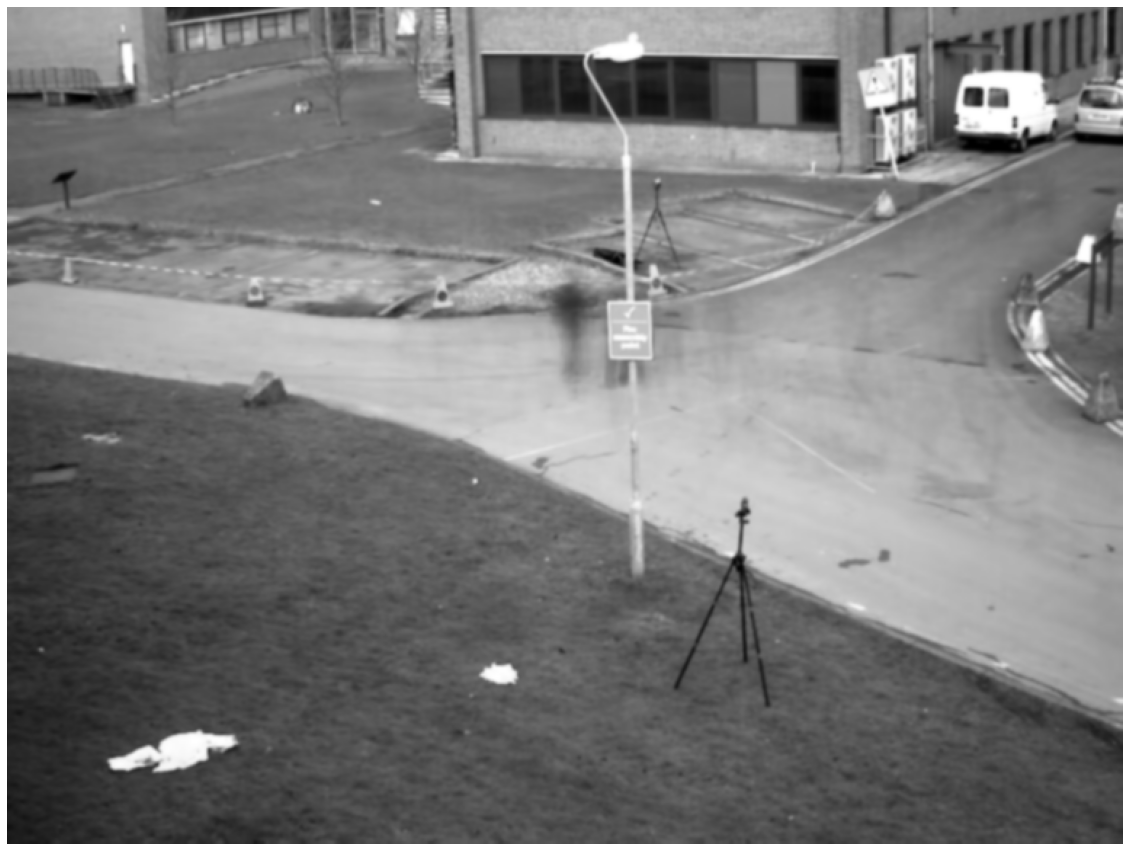

In [73]:
# 비디오 파일 열기
cap = cv2.VideoCapture('./data/vtest.avi')

if not cap.isOpened():
    print('Video open failed!')
    sys.exit()

# 배경 영상 등록
back=cv2.imread('./data/avg_bgr.png')
    
# 연산 속도를 높이기 위해 그레이스케일 영상으로 변환
back = cv2.cvtColor(back, cv2.COLOR_BGR2GRAY)

# 가우시안 블러로 노이즈 제거 (모폴로지, 열기, 닫기 연산도 가능)
back = cv2.GaussianBlur(back, (0, 0), 1.0)

# 출력
imshow(back)

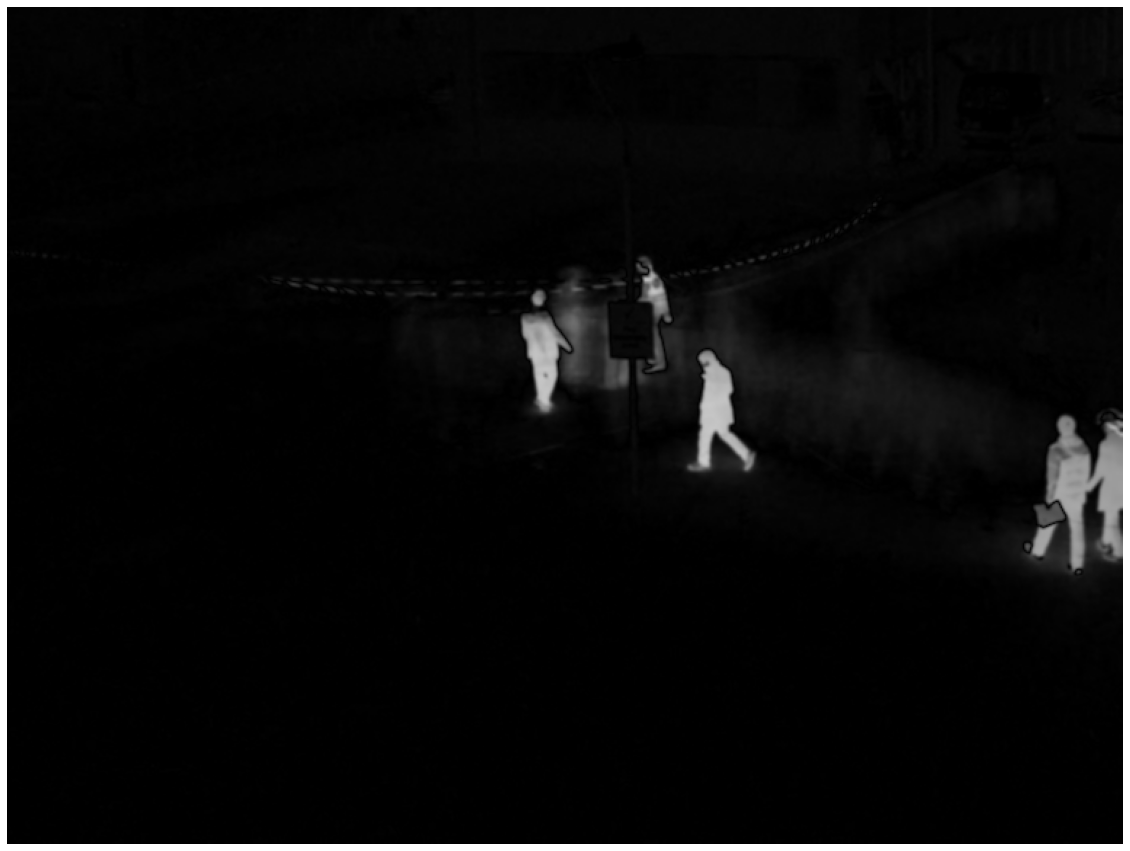

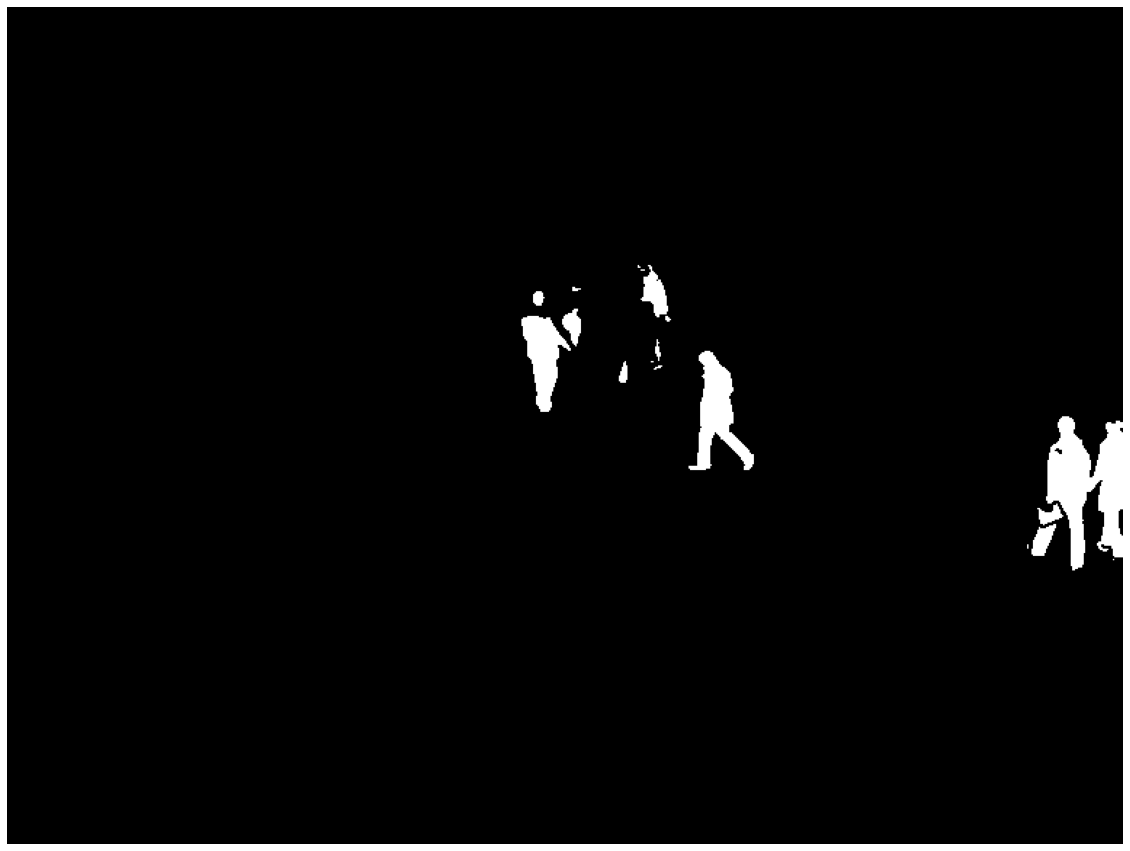

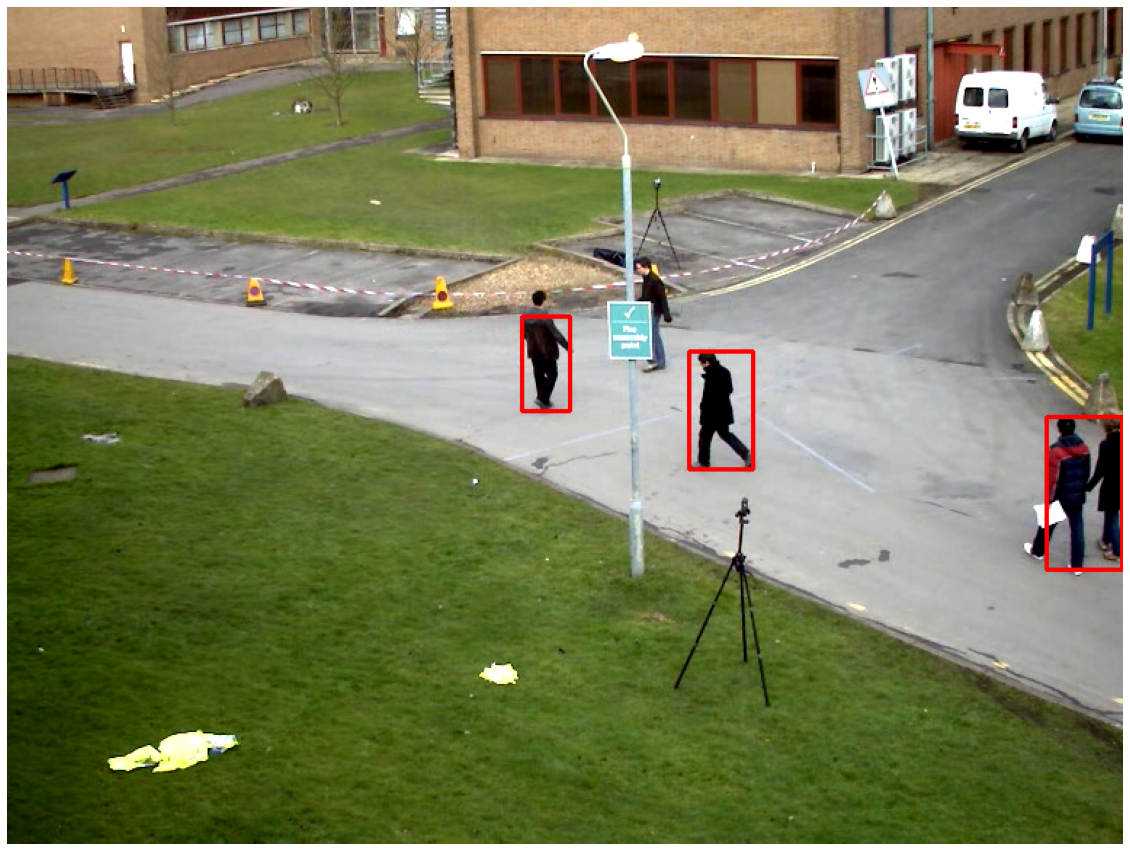

In [65]:
# 한 프레임에 대해서 실험

# 프레임 얻기 
ret, frame = cap.read()

# 그레이스케일 
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# 노이즈 제거 (블러링)
gray = cv2.GaussianBlur(gray, (0, 0), 1.0)

# 차영상 
diff = cv2.absdiff(gray, back)
imshow(diff)

# Thresholding (화소가 80이상이면 흰 색, 나머지 검은 색)
_, diff = cv2.threshold(diff,80, 255, cv2.THRESH_BINARY)
imshow(diff)

# 외곽선 검출 
contours, _ =cv2.findContours(diff,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

# 외곽선 검출한 것으로 bbox 추정 
AREA_TH=500
for i,cnt in enumerate(contours):
    area=cv2.contourArea(cnt) 
    if area>AREA_TH: 
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(frame, (x, y, w, h), (0, 0, 255), 2)
        
# 출력
imshow(frame)

In [74]:
# 비디오 매 프레임 처리 (외곽선 검출 방법)
while True:
    ret, frame = cap.read()
    
    if not ret:
        break
    
    # 현재 프레임 영상 그레이스케일 변환
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # 노이즈 제거
    gray = cv2.GaussianBlur(gray, (0, 0), 1.0)
    
    # 차영상 구하기 $ 이진화
    # absdiff는 차 영상에 절대값
    diff = cv2.absdiff(gray, back)
    # 차이가 80이상 255(흰색), 30보다 작으면 0(검정색)
    _, diff = cv2.threshold(diff, 80, 255, cv2.THRESH_BINARY)
    
    # 외곽선 검출을 이용하여 바운딩 박스 표시
    AREA_TH=100
    for i,cnt in enumerate(contours):
        area=cv2.contourArea(cnt) 
        if area>AREA_TH: 
            x, y, w, h = cv2.boundingRect(cnt)
            cv2.rectangle(frame, (x, y, w, h), (0, 0, 255), 2)
    
    cv2.imshow('frame', frame)
    cv2.imshow('diff', diff)

    if cv2.waitKey(30) == 27:
        break

cap.release()
cv2.destroyAllWindows()

In [40]:
# 비디오 매 프레임 처리 (레이블링 방법) 
while True:
    ret, frame = cap.read()
    
    if not ret:
        break
    
    # 현재 프레임 영상 그레이스케일 변환
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # 노이즈 제거
    gray = cv2.GaussianBlur(gray, (0, 0), 1.0)
    
    # 차영상 구하기 $ 이진화
    # absdiff는 차 영상에 절대값
    diff = cv2.absdiff(gray, back)
    # 차이가 80이상 255(흰색), 80보다 작으면 0(검정색)
    _, diff = cv2.threshold(diff, 80, 255, cv2.THRESH_BINARY)
    
    # 레이브링을 이용하여 바운딩 박스 표시
    cnt, _, stats, _ = cv2.connectedComponentsWithStats(diff)
    
    for i in range(1, cnt):
        x, y, w, h, s = stats[i]
        
        if s < 100:
            continue
            
        cv2.rectangle(frame, (x, y, w, h), (0, 0, 255), 2)
    
    cv2.imshow('frame', frame)
    cv2.imshow('diff', diff)

    if cv2.waitKey(30) == 27:
        break

cap.release()
cv2.destroyAllWindows()